In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# 1. IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
# 2. LOAD DATA (from Kaggle input)
train = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv")
test = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (7352, 563)
Test shape: (2947, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


0 0


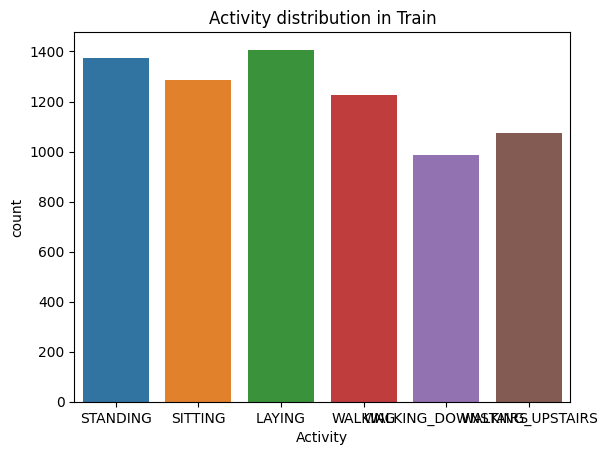

In [3]:
# Check for nulls
print(train.isna().sum().max(), test.isna().sum().max())

# Look at target distribution
sns.countplot(x="Activity", data=train)
plt.title("Activity distribution in Train")
plt.show()


In [4]:
# Separate features and target
X = train.drop(columns=["subject", "Activity"])
y = train["Activity"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# For test set
X_test = test.drop(columns=["subject", "Activity"])
y_test = test["Activity"]  # assuming test also has labels
y_test_encoded = le.transform(y_test)
X_test_scaled = scaler.transform(X_test)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [6]:
svm = SVC(kernel="rbf", probability=True, random_state=42)

# Optional: Hyperparameter tuning (Grid Search)
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)

svm_best = grid_svm.best_estimator_

# Predict on validation
y_val_pred_svm = svm_best.predict(X_val)
print("SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print(classification_report(y_val, y_val_pred_svm, target_names=le.classes_))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best SVM params: {'C': 10, 'gamma': 'scale'}
SVM Validation Accuracy: 0.9898028552005439
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.98      0.96      0.97       257
          STANDING       0.97      0.98      0.97       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



In [7]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# You can do a grid search too
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)

rf_best = grid_rf.best_estimator_

y_val_pred_rf = rf_best.predict(X_val)
print("RF Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf, target_names=le.classes_))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
RF Validation Accuracy: 0.9843643779741672
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.98      0.95      0.97       257
          STANDING       0.96      0.99      0.97       275
           WALKING       1.00      0.99      0.99       245
WALKING_DOWNSTAIRS       0.98      0.98      0.98       197
  WALKING_UPSTAIRS       0.99      1.00      0.99       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



In [8]:
# SVM test
y_test_pred_svm = svm_best.predict(X_test_scaled)
print("SVM Test Accuracy:", accuracy_score(y_test_encoded, y_test_pred_svm))
print("SVM Test Report:")
print(classification_report(y_test_encoded, y_test_pred_svm, target_names=le.classes_))

# RF test
y_test_pred_rf = rf_best.predict(X_test_scaled)
print("RF Test Accuracy:", accuracy_score(y_test_encoded, y_test_pred_rf))
print("RF Test Report:")
print(classification_report(y_test_encoded, y_test_pred_rf, target_names=le.classes_))


SVM Test Accuracy: 0.9565659993213438
SVM Test Report:
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.96      0.90      0.93       491
          STANDING       0.92      0.97      0.94       532
           WALKING       0.95      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.94      0.97      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.95      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

RF Test Accuracy: 0.9260264675941635
RF Test Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.90      0.91       491
          STANDING       0.91      0.92      0.92       532
           WALKING       0.90      0.96      0.9

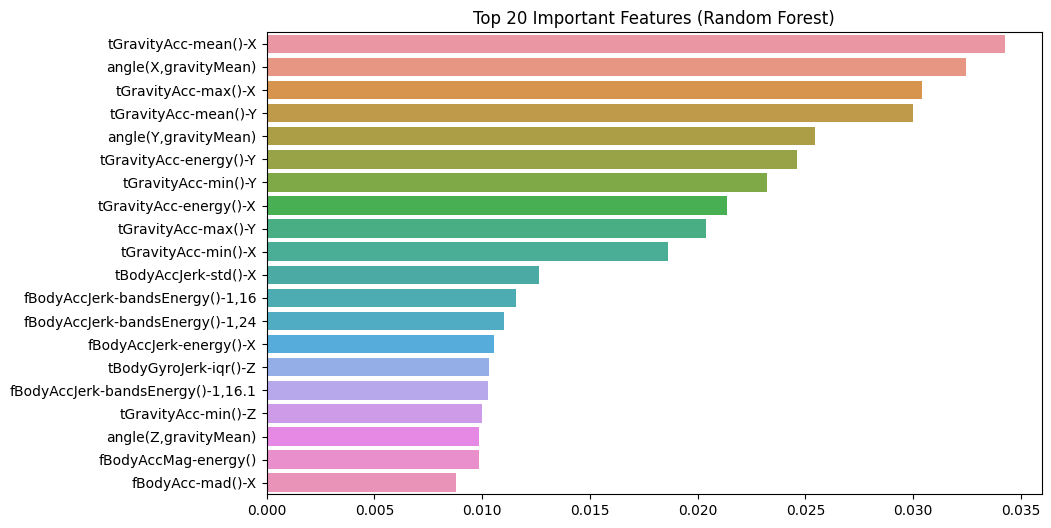

In [9]:
importances = rf_best.feature_importances_
feature_names = X.columns

# Get top 20 features
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Top 20 Important Features (Random Forest)")
plt.show()
